In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#membaca file
df = pd.read_csv('https://github.com/Adkurrr/prediction-of-the-number-of-pregnant-women-in-west-Java-province/blob/main/dinkes-od_17485_jumlah_ibu_hamil_berdasarkan_kabupatenkota_data.csv?raw=true')
df.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_ibu_hamil,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,126474,ORANG,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,51056,ORANG,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,46284,ORANG,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,79912,ORANG,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,62514,ORANG,2016


Praproses Data

In [ ]:
#mengecek data kosong
is_null = df.isnull().any().any()
print(is_null)

#memilih kolom yang digunakan
selected_columns = ['id', 'kode_kabupaten_kota', 'nama_kabupaten_kota', 'jumlah_ibu_hamil','tahun']
selected_data = df.loc[:, selected_columns]
selected_data.head()

#mengubah tipe data
selected_data['tahun'] = selected_data['tahun'].astype(str)
selected_data.dtypes

False


id                      int64
kode_kabupaten_kota     int64
nama_kabupaten_kota    object
jumlah_ibu_hamil        int64
tahun                  object
dtype: object

Visualisasi

In [ ]:
df = selected_data
df

,id,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_ibu_hamil,tahun
0,1,3201,KABUPATEN BOGOR,126474,2016
1,2,3202,KABUPATEN SUKABUMI,51056,2016
2,3,3203,KABUPATEN CIANJUR,46284,2016
3,4,3204,KABUPATEN BANDUNG,79912,2016
4,5,3205,KABUPATEN GARUT,62514,2016
...,...,...,...,...,...
130,131,3275,KOTA BEKASI,57307,2020
131,132,3276,KOTA DEPOK,48928,2020
132,133,3277,KOTA CIMAHI,11528,2020
133,134,3278,KOTA TASIKMALAYA,12181,2020


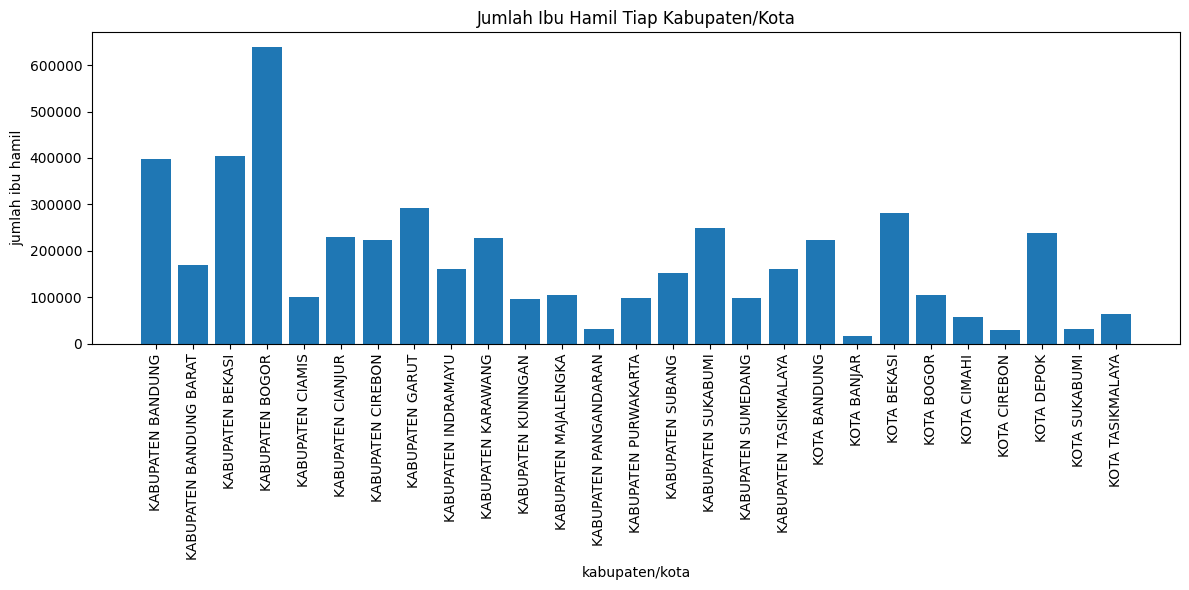

In [ ]:
#menggabungkan jumlah ibu hamil tiap kabupaten/kota pada semua tahun
combined_data = df.groupby('nama_kabupaten_kota')['jumlah_ibu_hamil'].sum().reset_index()

#membuat visualisasi
plt.figure(figsize=(12,6))
plt.bar(combined_data['nama_kabupaten_kota'], combined_data['jumlah_ibu_hamil'])
plt.xticks(rotation=90)
plt.xlabel('kabupaten/kota')
plt.ylabel('jumlah ibu hamil')
plt.title('Jumlah Ibu Hamil Tiap Kabupaten/Kota')
plt.tight_layout()
plt.show()

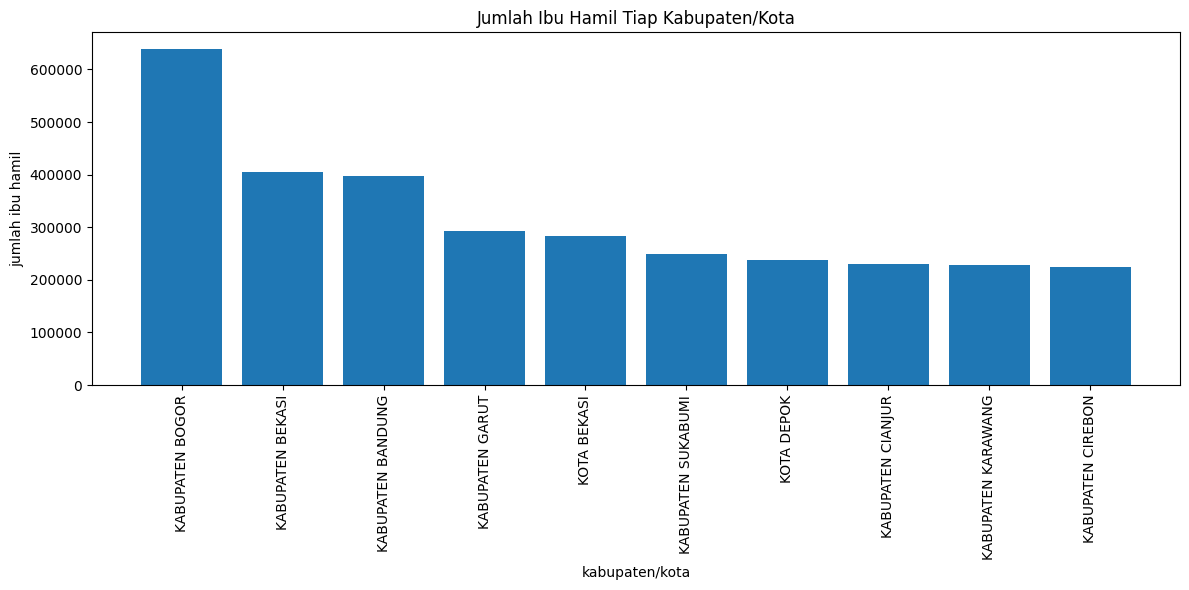

In [ ]:
#menggabungkan jumlah ibu hamil tiap kabupaten/kota pada semua tahun
combined_data = df.groupby('nama_kabupaten_kota')['jumlah_ibu_hamil'].sum().reset_index()

#mengurutkan data berdasarkan jumlah ibu hamil
df_sorted = combined_data.sort_values('jumlah_ibu_hamil', ascending=False)

#mengambil 10 kabupaten/kota dengan jumlah ibu hamil terbanyak
top_10 = df_sorted.head(10)

#membuat visualisasi
plt.figure(figsize=(12,6))
plt.bar(top_10['nama_kabupaten_kota'], top_10['jumlah_ibu_hamil'])
plt.xticks(rotation=90)
plt.xlabel('kabupaten/kota')
plt.ylabel('jumlah ibu hamil')
plt.title('Jumlah Ibu Hamil Tiap Kabupaten/Kota')
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

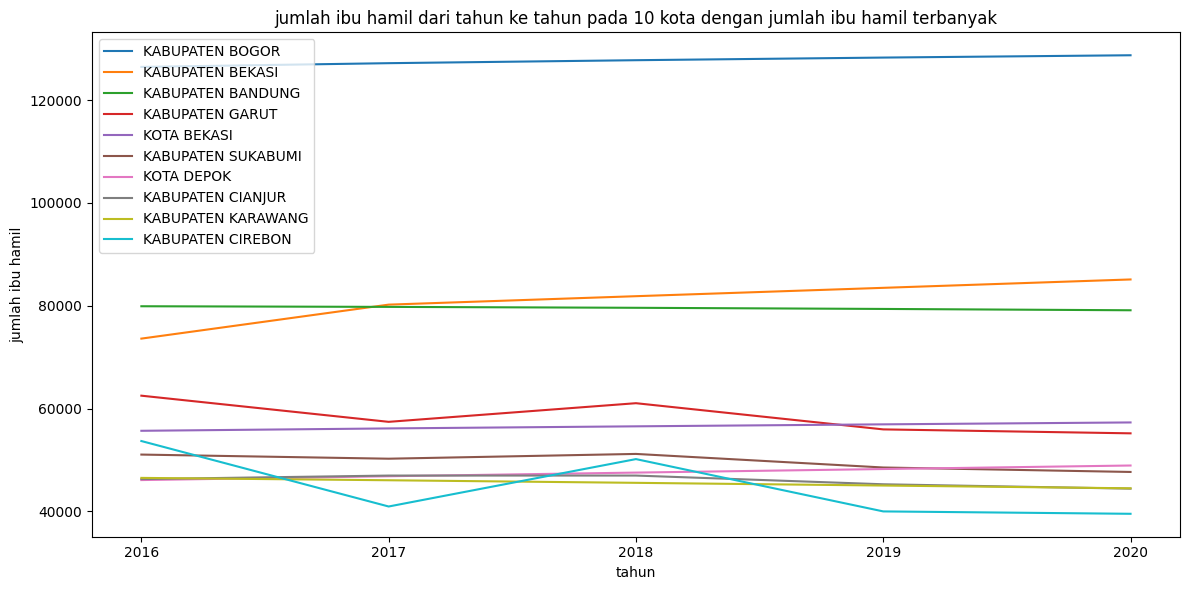

In [ ]:
list_kab_kota = df[df['nama_kabupaten_kota'].isin(['KABUPATEN BOGOR', 'KABUPATEN BEKASI', 'KABUPATEN BANDUNG', 'KABUPATEN GARUT', 'KOTA BEKASI', 'KABUPATEN SUKABUMI', 'KOTA DEPOK', 'KABUPATEN CIANJUR', 'KABUPATEN KARAWANG', 'KABUPATEN CIREBON'])]

#membuat line chart
plt.figure(figsize=(12,6))
for kota in ['KABUPATEN BOGOR', 'KABUPATEN BEKASI', 'KABUPATEN BANDUNG', 'KABUPATEN GARUT', 'KOTA BEKASI', 'KABUPATEN SUKABUMI', 'KOTA DEPOK', 'KABUPATEN CIANJUR', 'KABUPATEN KARAWANG', 'KABUPATEN CIREBON']:
  data_kota = list_kab_kota[list_kab_kota['nama_kabupaten_kota'] == kota]
  plt.plot(data_kota['tahun'], data_kota['jumlah_ibu_hamil'], label=kota)

plt.xlabel('tahun')
plt.ylabel('jumlah ibu hamil')
plt.title('jumlah ibu hamil dari tahun ke tahun pada 10 kota dengan jumlah ibu hamil terbanyak')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show